
## Linear Algebra for Electrical Systems (2020-2)
### Instructor: Young Min Kim
### TA: Cheol-Hui Min and Dongsu Zhang
---
HW4: Audio & Image processing using Convolution
===================

### In this homework, you will **implement the convolution operation using the generic numpy operations** We will apply our convolution for both 1-dim (audio) and 2-dim (image) data.
---
### **Instructions for HW4**


1.   **You are highly recommend to work in Colab enviornment**, since the data we use for this assignment may not be kindly downloaded by running the code in the local environment.
2.   There are **two problems** for this assignment, one for **section A** and the other for **section B**.
3.   Like HW2, please **read thouroughy all the comments and instruction** of this Notebook to grasp the idea of this homework.
4.   Please fill in all the 
```
# Section A, fill in here. / # Section B, fill in here.  
```
to finish your homework.
5.   If you have any question regarding this homework, **please post your question on the 'Class Forum' section on the eTL** so that we can share the problem with other students.
6.   You can refer to section **7.4 Convolution** and **Lecture 7** for doing this homework.
---
\\

### **Notes on the allowed/prohibited operations for HW4**
You can use the following generic numpy operations.

```
np.floor(), np.concatenate(), and basic algebraic operations like np.sum()
```

While you **can't use**


```
np.convolve(), np.flip(), scikit-learn
```




 To begin with, let's import relevant libraries we need for this homework. If you **are to work on your local environment (not on Colab), please install the following libraries**. 

```
torchvision, tensorflow
```



In [3]:
import torch
!pip install -q torchaudio
import torchaudio
import matplotlib.pyplot as plt
%matplotlib inline
!pip install -q tensorflow
import tensorflow as tf
import pathlib
import PIL
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
print("Successfully imported required libraries.")


Successfully imported required libraries.


# A. 1D Convolution for audio processing **(0.7 point)**

### Different from our textbook, **the practical formula for actual computation of 1D convolution**  (what's happending under the hood of deep learning APIs), can de defined as follows.
---
For given $n$dim data vector $\mathbf{x}$ and $m (\leq n) $ dim kernel vector $\mathbf{w}$, 
we first *pad* each side of data vector $\mathbf{x}$ with $p$ dimension.

The reason why we do *pad* here is to make the output dimension the same with input data dimension. Actually, you can reduce the size of output data by modifying the size of padding, **but we will compute and use the padding that keeps the dimension to avoid confusion.**


For example, (symmetrical) padding with $p=2$ is like figure below.

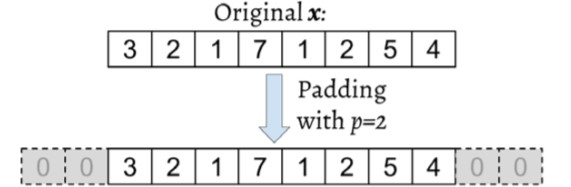

If we define the padded data vector as $\mathbf{x}^p$, the actual convolution yields outout vector $\mathbf{y}$ by the following operation.

$ \mathbf{y} = \mathbf{x}^p*\mathbf{w}$ is defined as 
\begin{align}
\ y_i = \sum_{k=0}^{k=m-1}x_{i+m-k-1}^p w_k
\end{align}

Note that entries of $\mathbf{x}^p$ and $\mathbf{w}$ are index in the opposing direction by the sign of $k$.

To avoid the complexity, if we flip the kernel vector $\mathbf{w}$, we can multiply both entries in the same direction. Thus, let's flip our kernel vector to $\mathbf{w}^r$.

Then, we can get more neat equation for comuting the entries of output data  $\mathbf{y}$.

\begin{align}
\ y_i = \sum_{k=0}^{k=m-1}x_{i+m-k-1}^p w^r_{m-k-1}=x_i^p w^r_0 + x_{i+1}^p w^r_{1} + ... + x_{i+m}^p w^r_{m} ~~~~~~~~~~~ (1)
\end{align}


For your information, the generic equation for the output dimension $o$ of convolution is computed as follows, with the convolution stride $s$ which determines the amount of movement to the next convolution operation.

\begin{align}
\ o = \left \lfloor{\frac{n+2p-m}{s}} + 1\right \rfloor ~~~~~~~~~~~~~~ (2)
\end{align}

where $ \left \lfloor{.} \right \rfloor$ is *floor* operation.


**For this section, you will be asked to implement the 1D Convolution which is just the the equation above.**


## Now, let's define our 1D convolution algorithm!



In [4]:
# 1D Convolution # 1D Convolution # 1D Convolution # 1D Convolution # 1D Convolution 

def calc_output_dims1d(input_dims, kernel, stride=1, padding='same'):
  """
  Computes the dimension of output data based on the intput_dimension and the kernel size.
  args:
    input_dims - input data dimension (L_in, C_in)
    kernel - 1D convolutional kernel of shape (L_k, C_k)
    output - output data dimension (L_out, C_out)
    stride - the amount of stride to the next convolution. we'll use 1 for this assignment.
    padding - the type of padding. We'll use 'same' padding for this assignment.
  output: the output data's dimension. [vector_length, channel_dim]
  """
  # first get the dimension of input data and kernel
  L_in, C_in = input_dims # input_length, input_channel
   # get kernel_length, kernel_channel
  L_k, C_k = # Section A, fill in here.   
  
  # choose which type of padding we use.
  if padding == 'same': # preserves the output dimension.
    # output dim is the same as input
    return # Section A, fill in here.
  elif padding == 'valid':
    # compute the output dimension, as in Eq.(2) above. 
    L_out = np.floor((L_in - L_k) / stride) + 1
    return L_out, C_k
  else:
    raise ValueError("Unsupported padding value: {padding}")

def calc_pad_dims1d(kernel, padding='same'):
  """
  Computes the amound ot padding required to make the output dimension same
  with input dimension. If we use 'valid' padding option, there's no padding. 
  args:
    kernel - 1D convolutional kernel of shape (L_k, C_k)
    padding - the type of padding. We'll use 'same' padding for this assignment.

  output - padding dimension L_pad
  """
  if padding == 'same':
    L_k, _ = kernel.shape
    # General computation for computing zero-padding size to make the output-dim
    # to be same with input-sim is complex.
    # Thus, we limit the case to stride=1, and 
    # the kernel dimension is an odd-integer for this assignemnt. 
    return np.floor((L_k - 1) / 2).astype(int) # please refer to https://cs231n.github.io/convolutional-networks/ 
  elif padding == 'valid':
    # We do not pad.
    return 0
  else:
    raise ValueError("Unsupported padding value: {padding}")
  
def pad1d(input, pad_dim):
  """
  Pad the input array for the given padding dimension.
  args:
    input - input veoctor of shape - (L_in, C_in)
    pad  - size of zero padding - P
  output: zero-padded input vector - (L_in + 2P, C_in)
  """
  P = pad_dim # get the padding size
  L_in, C_in = input.shape # get the input shape
  # create the zero padding of shape (P, C_in) for one side
  zero_pad = np.zeros(# Section A, fill in here.)
  # create padded array for both sides
  input_padded = np.concatenate([
                        # Section A, fill in here.], axis=0)
  return input_padded

  # return np.pad(
  #     array=array, pad_width=((0, 0), (pad_dim, pad_dim), (0, 0)),
  #     mode='constant'
  # )

def convolution1d(input, kernel, stride=1, padding='same'):
  """
  Main function for 1D Convolution.
  args:
    input - input veoctor of shape - (L_in, C_in)
    kernel - kernel vector of shape - (L_k, C_k)
  output: output vector of shape (L_out, C_k)
  """
  # deepcopy the data to avoid unexpected behavior
  input_array = np.array(input, copy=True)
  L_in, _ = input_array.shape # Get input shape

  # get the output shape
  output_shape = calc_output_dims1d(input_dims=input_array.shape, kernel=kernel)
  L_out, _ = output_shape # Get output shape

  # get the kernel shape  
  L_k, C_k = # Section A, fill in here.

  # compute the padding dimension based on kernel and padding type 
  pad_dim = calc_pad_dims1d(kernel=kernel, padding=padding)
  # pad the input vector with computed padding size
  padded_array = pad1d(input=input_array, pad_dim=pad_dim)

  # create the placeholder for output
  output = np.zeros(# Section A, fill in here.)

  # start convolution with given stride = 1, along the input's data dimension.
  for i in range(# Section A, fill in here.):
      L_start = i * stride
      L_end = L_start + # Section A, fill in here.
      _output = # Section A, fill in here. * kernel
      output[i, :] = np.sum(_output, axis=0)

  return output

SyntaxError: ignored

## Then we prepare the proper dataset for 1D convolution, the audio data.


In [ ]:
voice_data = torchaudio.datasets.CMUARCTIC('./', download=True)
# It may take a while since we're downloading 89MB of audio dataset.

Waveform: [[9.1552734e-05]
 [1.5258789e-04]
 [3.0517578e-04]
 ...
 [1.8920898e-03]
 [1.8005371e-03]
 [1.9226074e-03]]
Sample rate: 16000
Labels: God bless 'em, I hope I'll go on seeing them forever.


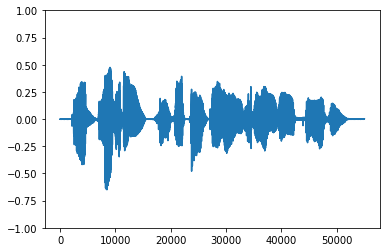

In [ ]:
# Visualise the audio data
waveform, sample_rate, labels, _  = voice_data[5] # You can change the indexing of sample here!
waveform = waveform.t().numpy()
print("Waveform: {}\nSample rate: {}\nLabels: {}".format(waveform, sample_rate, labels))

plt.figure()
plt.ylim(-1, 1)
plt.plot(waveform)

# Let's hear how it sounds!
Audio(np.squeeze(waveform), rate=sample_rate)

## Let's define custom kernel and apply our 1D Convolution to it.

### **CAVEAT**: as mentioned in the code, the kernel size should be an odd integer since our implementation is a simplified convolution that does not cover all case. 


4
Convolved Waveform: [[9.49435764e-05]
 [7.79893663e-05]
 [6.10351562e-05]
 ...
 [1.18001302e-03]
 [1.10541450e-03]
 [9.86735026e-04]]
Sample rate: 16000
Labels: God bless 'em, I hope I'll go on seeing them forever.


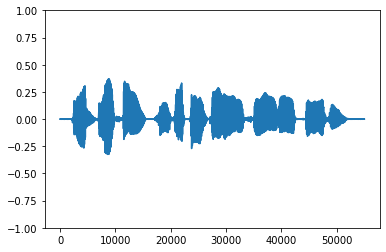

In [ ]:
K = 9 # make sure the first entry of kernel size be an odd integer
kern1d = np.ones((K, 1)) / K 
# NOTE: don't forget to flip our kernel to make convolution kernel!
# please refer to https://rfriend.tistory.com/518
kern1d = # Section A, fill in here.
out = convolution1d(input=waveform, kernel=kern1d)
print("Convolved Waveform: {}\nSample rate: {}\nLabels: {}".format(out, sample_rate, labels))
plt.figure()
plt.ylim(-1, 1)
plt.plot(out)
# Let's hear how it sounds!
Audio(np.squeeze(out), rate=sample_rate)

### We got smoother signal by convolving with our time-series smoothing filter!
### Can you tell the difference between the audio before & after convolving?



# B. 2D Convolution for image processing **(0.3 point)**

### Now, let's implement the 2D Convolution, an spatially extended version of 1D convolution.
---
For the given matrix $\mathbf{X}$ of $(n_1\times n_2)$ dim, its 2D convolution with kernel 
$\mathbf{W}$ of $(m_1 (\leq n_1)\times m_2(\leq n_2))$ dim yields a matrix $\mathbf{Y}$,
where the convolution is formulated as,

\begin{align}
\mathbf{Y}_{i,j} = \sum_{k_1=0}\sum_{k_2=0}\mathbf{X}_{(i+m_1-k_1-1,j+m_2-k_2-1)}^p \mathbf{W}^r_{(m_1-k_1-1, m_2-k_2-1)}~~~~~~~~~~~ (3)
\end{align}

which is just an spatially extended version of **Eq.(2)**. Thus, the actual implementation will 
be almost the same as 1D Convolution, except that we deal with the input and kernel with one more
entry.



In [ ]:
def calc_output_dims2d(input_dims, kernel, stride=1, padding='same'):
  """
  Computes the dimension of output data based on the intput_dimension and the kernel size.
  args:
    input_dims - input data dimension (H_in, W_in, C_in)
    kernel - 2D convolutional kernel of shape (H_k, W_k, C_k)
    output - output data dimension (H_out, W_out, C_out)
    stride - the amount of stride to the next convolution. we'll use 1 for this assignment.
    padding - the type of padding. We'll use 'same' padding for this assignment.
  output: the output data's dimension. [height, width, channel_dim]
  """
  # first get the dimension of input data and kernel
  H_in, W_in, _ = input_dims # input height, input_width, input_channel
  # get kernel_height, kernel_width, kernel_channel
  H_k, W_k, C_k = # Section B, fill in here.

  # choose which type of padding we use.
  if padding == 'same': # preserves the output dimension
    # output dim is the same as input
    return # Section B, fill in here.
  elif padding == 'valid':
    # compute the output dimension, as in Eq.(2) above. 
    H_out = (H_in - H_k) // stride + 1
    W_out = (W_in - W_k) // stride + 1
    return H_out, W_out, C_k
  else:
    raise ValueError("Unsupported padding value: {padding}")

def calc_pad_dims2d(kernel, padding='same'):
  """
  Computes the amound ot padding required to make the output dimension same
  with input dimension. If we use 'valid' padding option, there's no padding. 
  args:
    kernel - 2D convolutional kernel of shape (H_k, W_k, C_k)
    padding - the type of padding. We'll use 'same' padding for this assignment.

  output - 2 element tuple (H_pad, W_pad)
  """
  if padding == 'same':
    H_k, W_k, _ = kernel.shape
    # General computation for computing zero-padding size to make the output-dim
    # to be same with input-sim is complex.
    # Thus, we limit the case to stride=1, and 
    # the kernel dimension is an odd-integer for this assignemnt. 
    return np.floor((H_k - 1) / 2).astype(int), np.floor((W_k - 1) / 2).astype(int) # please refer to https://cs231n.github.io/convolutional-networks/ 
  elif padding == 'valid':
    # We do not pad.
    return 0, 0
  else:
    raise ValueError("Unsupported padding value: {padding}")
  
def pad2d(input, pad_dim):
  """
  Pad the input array for the given padding dimension.
  args:
    input - input veoctor of shape - (H_in, W_in, C_in)
    pad  - size of zero padding - (H_pad, W_pad)
  output: zero-padded input vector - (H_in + 2 * H_pad, W_in + 2 * W_pad, C_in)
  """
  H_pad, W_pad = pad_dim # get the padding size
  H_in, W_in, C_in = input.shape # get the input shape
  # create the zero padding array of shape (H_in + 2 * H_pad, W_in + 2 * W_pad, C_in)
  input_padded = # Section B, fill in here.
  # replace the inner side of the zero_padded array with input data, to make sure
  # the margin of padded array is zero.
  input_padded[H_pad:H_pad + H_in, # Section B, fill in here.] = # Section B, fill in here.
  return input_padded

def convolution2d(input, kernel, stride=1, padding='same'):
  """
  Main function for 2D Convolution.
  args:
    input - input veoctor of shape - (H_in, W_in, C_in)
    kernel - kernel vector of shape - (H_k, W_k, C_k)
  output: output vector of shape (H_out, W_out, C_k)
  """
  # deepcopy the data to avoid unexpected behavior
  input_array = np.array(input, copy=True)
  H_in, W_in, _ = input.shape # Get input shape

  # get the output shape
  output_shape = calc_output_dims2d(input_dims=input.shape, kernel=kernel)
  H_out, W_out, _ = output_shape # Get output shape
  
  # get the kernel shape  
  H_k, W_k, C_k =# Section B, fill in here.

  # compute the padding dimension based on kernel and padding type 
  pad_dim = calc_pad_dims2d(kernel=kernel, padding=padding)
  # pad the input vector with computed padding size
  padded_array = pad2d(input=input, pad_dim=pad_dim)

  # create the placeholder for output
  output = np.zeros(# Section B, fill in here.)

  # start convolution with given stride = 1, along the input's data dimension.
  for i in range(# Section B, fill in here.):
    for j in range(# Section B, fill in here.):
      H_start = i * stride
      H_end = H_start + # Section B, fill in here.
      W_start = j * stride
      W_end = W_start + # Section B, fill in here.
      _output = # Section B, fill in here. * kernel
      output[i, j, :] = np.sum(_output, axis=(0, 1))

  return output



## Now, let's apply our 2D Convolution algorithm!



### First, prepare the image data 

### **CAVEAT:** For the ease of data download, you are highly recommend work on the Colab environment, since there might occur certification issue if you run the code below in your local environment.
### **We won't** support debugging such issue.

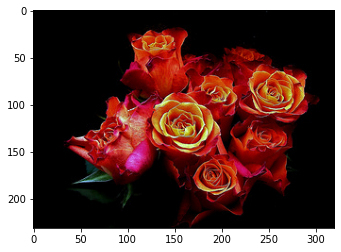

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)
roses = list(data_dir.glob('roses/*'))
img = PIL.Image.open(str(roses[2])) # change the image index if you want another sample!
img = np.asarray(img) / 255
plt.imshow(img)

# define the kernel size
# Make sure they are an odd natural number
K1, K2 = 5, 5

### Convolution with blurring kernel

First, we'll create the blurring kernel based on the 2D  Gaussian.

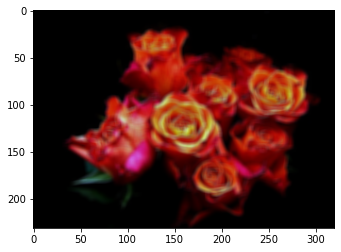

In [ ]:
# Create 2D gaussian kernel of shape (K1, K2)
x, y = np.meshgrid(np.linspace(-1, 1, K1), np.linspace(-1, 1, K2))
d = np.sqrt(x**2 + y**2)
sigma, mu = # Section B, fill in here.
gauss2d = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ))) 
gauss2d = gauss2d / np.sum(gauss2d)
gauss2d = np.tile(gauss2d[...,None], [1, 1, 3])
# NOTE: don't forget to flip the kernel!
# please refer to https://rfriend.tistory.com/518
gauss2d = # Section B, fill in here.

out = np.clip(convolution2d(input=img, kernel=gauss2d), 0.0, 1.0) # clip the value to make a valid image.
plt.imshow(out)

### Convolution with vertical kernel

Next, we'll test the vertical sobel filter, to extract a vertically salient features.

*   Sobel filter: https://en.wikipedia.org/wiki/Sobel_operator


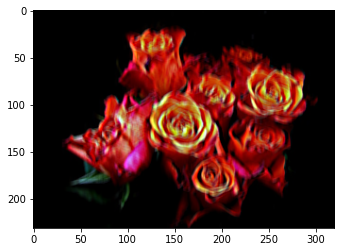

In [ ]:
# vertical convolution
vert_filt = np.vstack([np.arange(1,-1,-0.4)] * 5)
vert_filt = vert_filt / np.sum(vert_filt)
sobel_vert = np.tile(vert_filt[..., None],(1,1,3))
# NOTE: don't forget to flip the kernel!
# please refer to https://rfriend.tistory.com/518
sobel_vert = # Section B, fill in here.

out = np.clip(convolution2d(input=img, kernel=sobel_vert), 0.0, 1.0)
plt.imshow(out)

### Convolution with horizontal kernel
Finally, we'll test the vertical sobel filter, to extract a horizontally salient features.


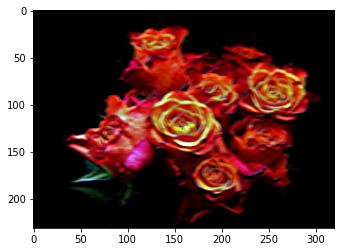

In [ ]:
# horizontal convolution
# It's a transpose of the vertical kernel.
# please refer to https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html
hor_filt = np.vstack([np.arange(1,-1,-0.4)] * 5).# Section B, fill in here.
hor_filt = hor_filt / np.sum(hor_filt)
sobel_hor = np.tile(hor_filt[..., None],(1,1,3))
# NOTE: don't forget to flip the kernel!
# please refer to https://rfriend.tistory.com/518
sobel_hor = # Section B, fill in here.

out = np.clip(convolution2d(input=img, kernel=sobel_hor), 0.0, 1.0)
plt.imshow(np.squeeze(out))